# Project MNIST

In [1]:
import project_mnist_utils as utils
import numpy as np
import torch
import torchvision
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import random
import time
import seaborn as sn
import pandas as pd
from torchview import draw_graph

/Users/lilian/Library/Python/3.9/lib/python/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_data, train_targets, test_data, test_targets = utils.load_data()

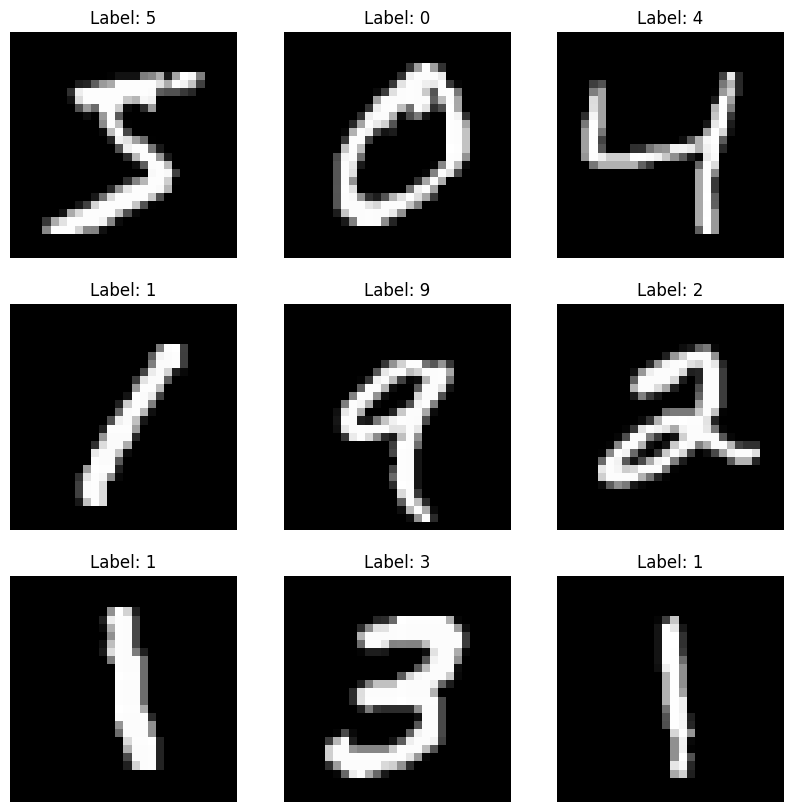

In [3]:
utils.plot_example(train_data, train_targets)

# Shallow model

No regularization

In [2]:
shallow_model = utils.get_shallow_model()
trained_shallow_model, train_losses, test_losses, train_acc, test_acc = utils.train_model(shallow_model, nb_epochs=20, lambda_l2=0)

Epoch 20
Training finished!


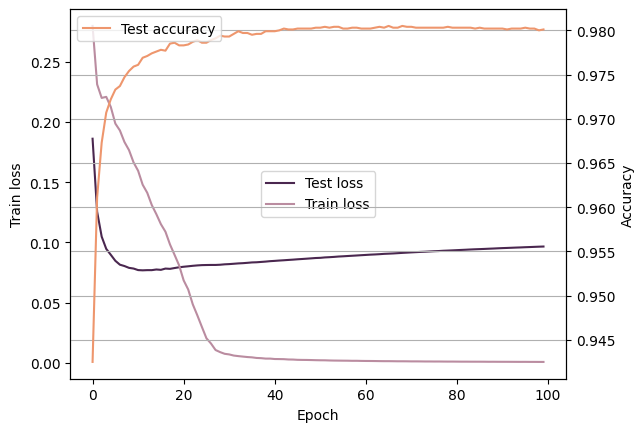

In [9]:
#F5C2A3 light orange
#EE966D dark orange
#BA8CA0 light purple
#4A274F dark purple

fig, ax1 = plt.subplots()

ax1.plot(test_losses, label="Test loss", color='#4A274F')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Test loss")

ax1.plot(train_losses, label="Train loss", color='#BA8CA0')
ax1.set_ylabel("Train loss")
ax1.legend(loc='center')

ax2 = ax1.twinx()
ax2.plot(test_acc, label="Test accuracy", color='#EE966D')
ax2.set_ylabel("Accuracy")
ax2.legend(loc='upper left')

plt.grid()
plt.show()

# Deep model (with and without L2)

In [2]:
deep_model = utils.get_deep_model()
trained_deep_model, train_losses, test_losses, train_acc, test_acc = utils.train_model(deep_model, nb_epochs=100, lambda_l2=1e-3, lr=1e-1, batch_size=100)

Epoch 100
Training finished!


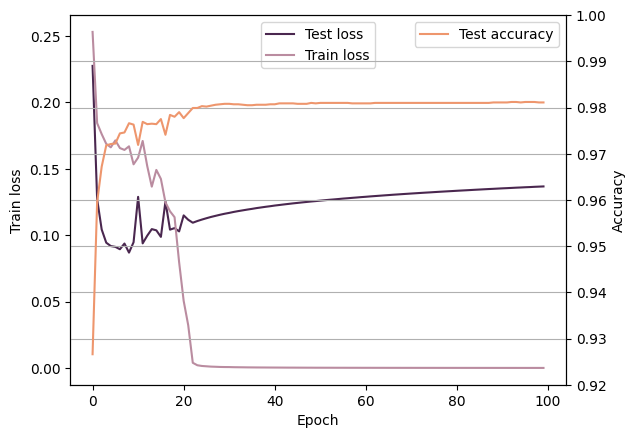

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(test_losses, label="Test loss", color='#4A274F')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Test loss")

ax1.plot(train_losses, label="Train loss", color='#BA8CA0')
ax1.set_ylabel("Train loss")
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.plot(test_acc, label="Test accuracy", color='#EE966D')
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0.92, 1)
ax2.legend(loc='upper right')

plt.grid()
plt.show()

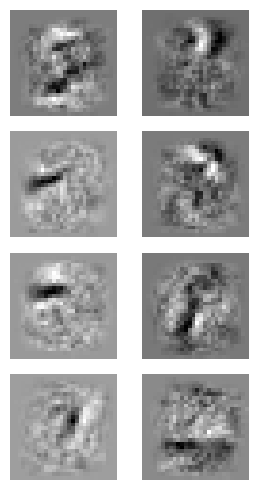

In [3]:
# Display the weights
trained_deep_model.eval()
with torch.no_grad():
    w = trained_deep_model[0].weight
    # Get 20 random weights
    random_weights = random.sample(list(w), 8)

    # Create a 3x3 grid
    fig, axes = plt.subplots(4, 2, figsize=(3, 5))

    # Display the weights on the grid
    for i, ax in enumerate(axes.flat):
        ax.imshow(random_weights[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# L2 param tuning

In [2]:
lambda_l2s = np.logspace(-7, -1, 10)

test_losses = []
train_losses = []

for lambda_l2 in lambda_l2s:
    print(f"Training with lambda_l2={lambda_l2}")
    deep_model = utils.get_deep_model()
    trained_deep_model, l_train_losses, l_test_losses, _, _ = utils.train_model(deep_model, nb_epochs=50, lambda_l2=lambda_l2, lr=1e-1, batch_size=100)
    test_losses.append(l_test_losses)
    train_losses.append(l_train_losses)


Training with lambda_l2=1e-07
Epoch 50
Training finished!
Training with lambda_l2=4.641588833612782e-07
Epoch 50
Training finished!
Training with lambda_l2=2.1544346900318822e-06
Epoch 50
Training finished!
Training with lambda_l2=1e-05
Epoch 50
Training finished!
Training with lambda_l2=4.641588833612772e-05
Epoch 50
Training finished!
Training with lambda_l2=0.00021544346900318823
Epoch 50
Training finished!
Training with lambda_l2=0.001
Epoch 50
Training finished!
Training with lambda_l2=0.004641588833612773
Epoch 50
Training finished!
Training with lambda_l2=0.021544346900318822
Epoch 50
Training finished!
Training with lambda_l2=0.1
Epoch 50
Training finished!


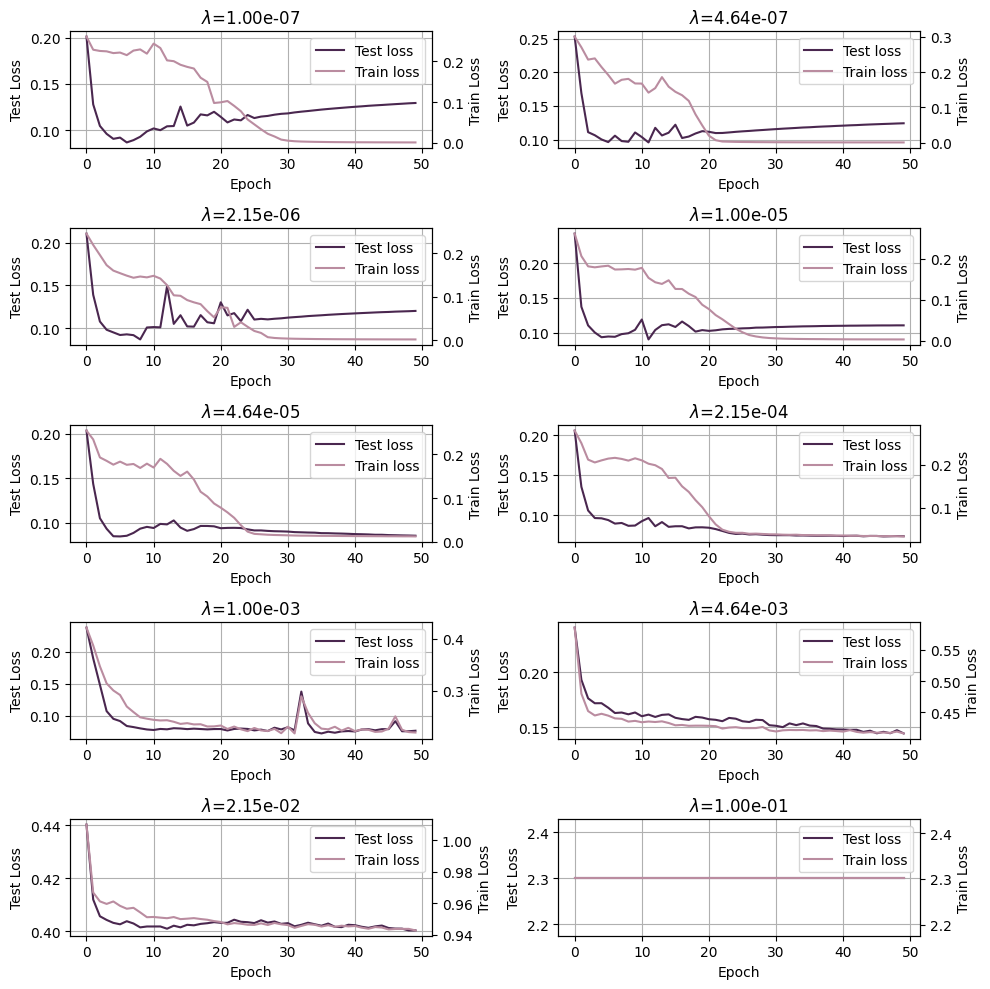

In [5]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))

for i, lambda_l2 in enumerate(lambda_l2s):
    ax1 = ax[i // 2, i % 2]
    ax2 = ax1.twinx()

    test = ax1.plot(test_losses[i], label="Test loss", color='#4A274F')
    ax1.set_title(f"$\lambda$={lambda_l2:.2e}")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Test Loss")
    ax1.grid()

    train = ax2.plot(train_losses[i], label="Train loss", color='#BA8CA0')
    ax2.set_ylabel("Train Loss")

    merged = test + train
    labels = [l.get_label() for l in merged]
    ax1.legend(merged, labels, loc=0)

plt.tight_layout()

# \# neurons tuning

In [27]:
nb_hidden = [10, 50, 100, 200, 500]
lambda_l2 = 0

test_losses = []
train_losses = []
train_acc = []
test_acc = []
times = []

for nb in nb_hidden:
    print(f"Training with nb_hidden={nb}")
    deep_model = utils.get_deep_model(nb_hidden=nb)
    start = time.time()
    trained_deep_model, l_train_losses, l_test_losses, l_train_acc, l_test_acc = utils.train_model(deep_model, nb_epochs=50, lambda_l2=lambda_l2, lr=1e-1, batch_size=100)
    end = time.time()
    times.append(end - start)
    test_losses.append(l_test_losses)
    train_losses.append(l_train_losses)
    train_acc.append(l_train_acc)
    test_acc.append(l_test_acc)

Training with nb_hidden=10
Epoch 50
Training finished!
Training with nb_hidden=50
Epoch 50
Training finished!
Training with nb_hidden=100
Epoch 50
Training finished!
Training with nb_hidden=200
Epoch 50
Training finished!
Training with nb_hidden=500
Epoch 50
Training finished!


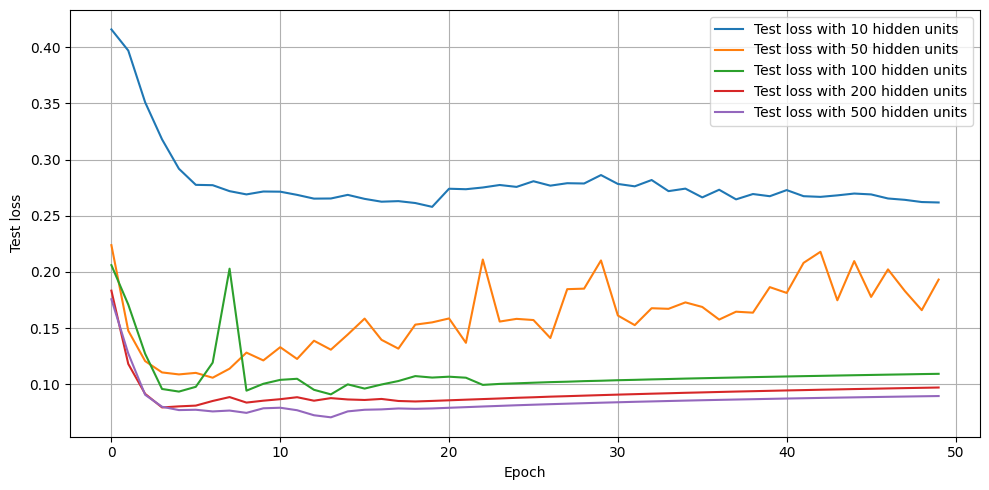

In [29]:
plt.figure(figsize=(10, 5))

for i, nb in enumerate(nb_hidden):
    plt.plot(test_losses[i], label=f"Test loss with {nb} hidden units")
    plt.xlabel("Epoch")
    plt.ylabel("Test loss")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

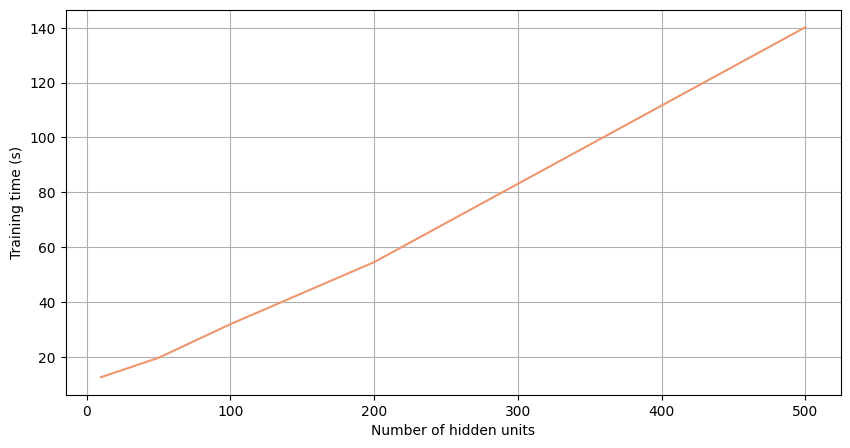

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(nb_hidden, times, color='#EE966D')
plt.xlabel("Number of hidden units")
plt.ylabel("Training time (s)")
plt.grid()
plt.show()

# Learning rate tuning

In [69]:
lrs = np.logspace(-4, 0, 10)

test_losses = []
train_losses = []
train_acc = []
test_acc = []

for lr in lrs:
    print(f"Training with lr={lr}")
    deep_model = utils.get_deep_model(nb_hidden=50)
    trained_deep_model, l_train_losses, l_test_losses, l_train_acc, l_test_acc = utils.train_model(deep_model, nb_epochs=50, lambda_l2=8e-3, lr=lr, batch_size=100)
    test_losses.append(l_test_losses)
    train_losses.append(l_train_losses)
    train_acc.append(l_train_acc)
    test_acc.append(l_test_acc)

Training with lr=0.0001
Epoch 50
Training finished!
Training with lr=0.0002782559402207126
Epoch 50
Training finished!
Training with lr=0.000774263682681127
Epoch 50
Training finished!
Training with lr=0.002154434690031882
Epoch 50
Training finished!
Training with lr=0.005994842503189409
Epoch 50
Training finished!
Training with lr=0.016681005372000592
Epoch 50
Training finished!
Training with lr=0.046415888336127774
Epoch 50
Training finished!
Training with lr=0.12915496650148828
Epoch 50
Training finished!
Training with lr=0.3593813663804626
Epoch 50
Training finished!
Training with lr=1.0
Epoch 50
Training finished!


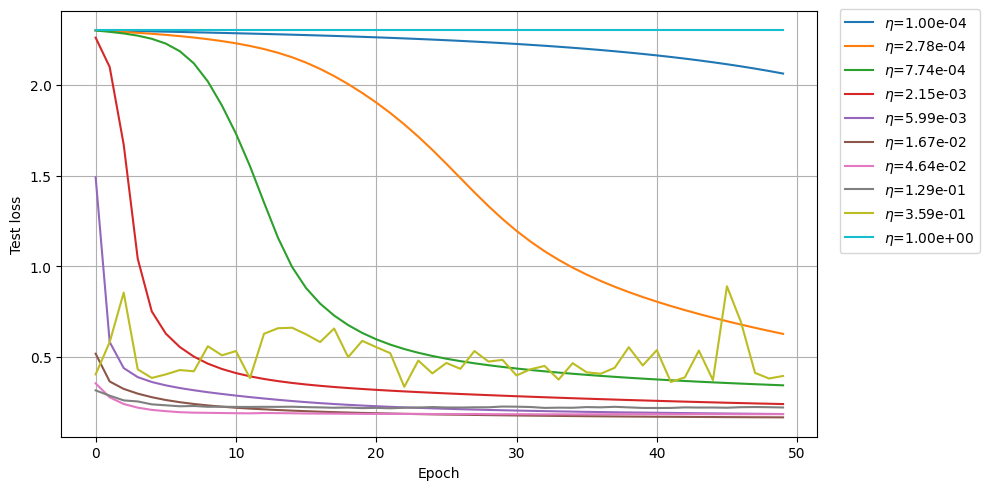

In [85]:
plt.figure(figsize=(10, 5))
for i, lr in enumerate(lrs):
    plt.plot(test_losses[i], label=f"$\eta$={lr:.2e}")
    plt.xlabel("Epoch")
    plt.ylabel("Test loss")
    plt.legend(bbox_to_anchor=(1.02, 1.02))

plt.grid()
plt.tight_layout()
plt.show()

In [96]:
deep_model = utils.get_deep_model(nb_hidden=50)
trained_deep_model, train_losses, test_losses, train_acc, test_acc = utils.train_model(deep_model, nb_epochs=100, lambda_l2=8e-3, lr=1e-6, batch_size=100)

Epoch 100
Training finished!


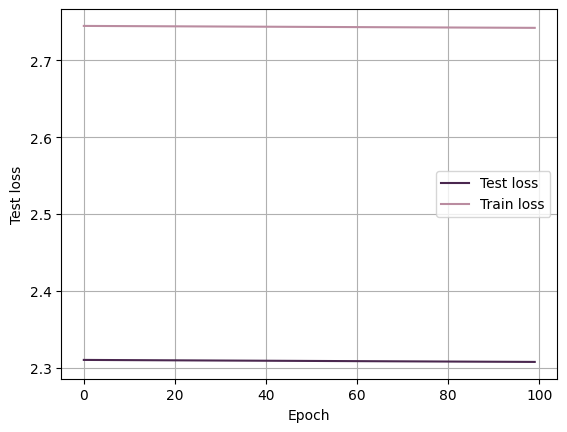

In [99]:
plt.plot(test_losses, label="Test loss", color='#4A274F')
plt.plot(train_losses, label="Train loss", color='#BA8CA0')
plt.xlabel("Epoch")
plt.ylabel("Test loss")
plt.legend()
plt.grid()
plt.show()

# Tuning batch size

In [9]:
batch_sizes = [10, 50, 100, 200, 500]

test_losses = []
train_losses = []
train_acc = []
test_acc = []

for batch_size in batch_sizes:
    print(f"Training with batch_size={batch_size}")
    deep_model = utils.get_deep_model(nb_hidden=50)
    trained_deep_model, l_train_losses, l_test_losses, l_train_acc, l_test_acc = utils.train_model(deep_model, nb_epochs=50, lambda_l2=8e-3, lr=1e-1, batch_size=batch_size)
    test_losses.append(l_test_losses)
    train_losses.append(l_train_losses)
    train_acc.append(l_train_acc)
    test_acc.append(l_test_acc)

Training with batch_size=10
Epoch 50
Training finished!
Training with batch_size=50
Epoch 50
Training finished!
Training with batch_size=100
Epoch 50
Training finished!
Training with batch_size=200
Epoch 50
Training finished!
Training with batch_size=500
Epoch 50
Training finished!


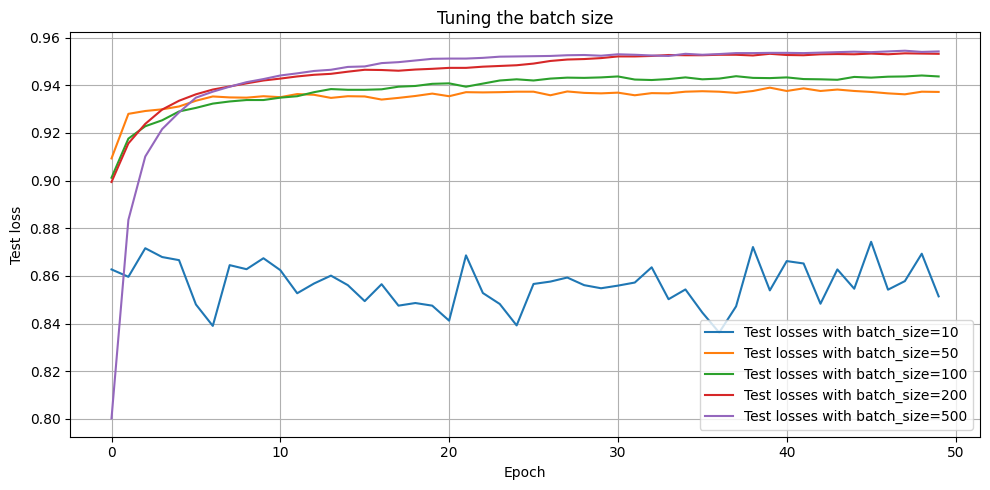

In [14]:
plt.figure(figsize=(10, 5))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(test_acc[i], label=f"Test losses with batch_size={batch_size}")
    plt.title(f"Tuning the batch size")
    plt.xlabel("Epoch")
    plt.ylabel("Test loss")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Dropout

In [17]:
p_values = [0, 0.25, 0.5]

test_losses = []
train_losses = []
train_acc = []
test_acc = []

for p in p_values:
    print(f"Training with p={p}")
    deep_model = utils.get_dropout_model(nb_hidden=50, p=p)
    trained_deep_model, l_train_losses, l_test_losses, l_train_acc, l_test_acc = utils.train_model(deep_model, nb_epochs=50, lambda_l2=0, lr=1e-1, batch_size=100)
    test_losses.append(l_test_losses)
    train_losses.append(l_train_losses)
    train_acc.append(l_train_acc)
    test_acc.append(l_test_acc)

Training with p=0
Epoch 50
Training finished!
Training with p=0.25
Epoch 50
Training finished!
Training with p=0.5
Epoch 50
Training finished!


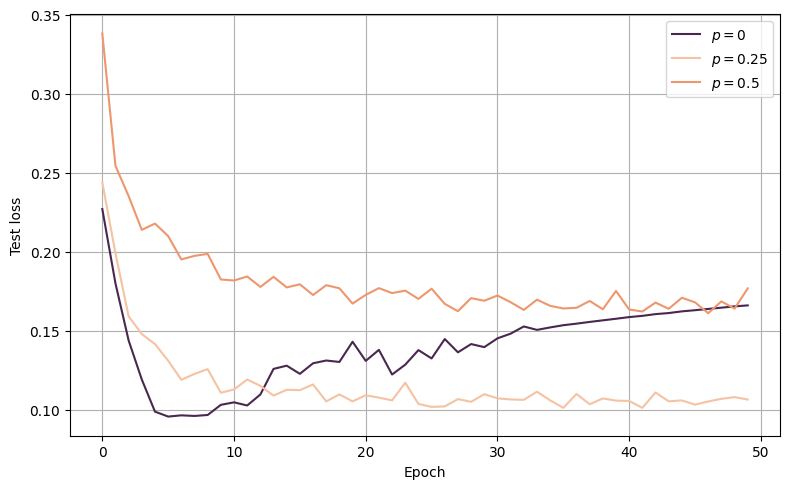

In [26]:
plt.figure(figsize=(8, 5))

colors = ['#4A274F', '#F5C2A3', '#EE966D']

for i, p in enumerate(p_values):
    plt.plot(test_losses[i], label=f"$p={p}$", color=colors[i])
    plt.xlabel("Epoch")
    plt.ylabel("Test loss")
    plt.legend()

plt.grid()
plt.tight_layout()
plt.show()

# Best model

In [2]:
best_model = utils.get_dropout_model(nb_hidden=100, p=0.25)

trained_best_model, train_losses, test_losses, train_acc, test_acc = utils.train_model(best_model, nb_epochs=100, lambda_l2=1e-3, lr=1e-1, batch_size=100)

Epoch 100
Training finished!


In [5]:
test_loss, test_accuracy, confusion_matrix = utils.eval_model(trained_best_model, nn.CrossEntropyLoss(), test_data, test_targets)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9768000245094299


In [25]:
reversed_matrix = confusion_matrix[::-1]
print(reversed_matrix)


[[   3    3    0    4   11    5    0    3    0  980]
 [   4    1    2    7    4    6    2    2  941    5]
 [   3   10   11    3    0    0    0  992    1    8]
 [  10    3    0    0    2   19  924    0    0    0]
 [   2    0    0    2    1  882    0    0    4    1]
 [   1    0    3    0  965    0    4    1    0    8]
 [   0    0    1  992    0    9    0    4    2    2]
 [   8    4  996    9    3    1    3    3    5    0]
 [   0 1124    0    3    0    0    1    1    6    0]
 [ 972    0    1    0    0    3    1    1    2    0]]


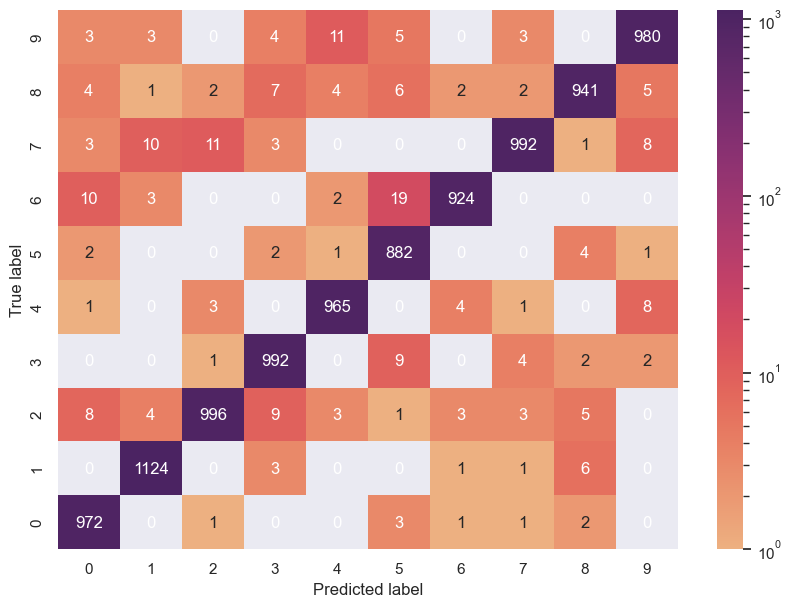

In [30]:
df_cm = pd.DataFrame(confusion_matrix[::-1], range(9, -1, -1), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g', norm=LogNorm(), cmap='flare') # font size
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()